### 0. Setting a Goal
1. The tendency of World Wide Song List
2. See Data Charactertis, how to become Top1 
3. The degree of linking between Countries
4. Arima Model to Predict tomorrow "Streams"   

### 1. Basic Auditing
1. How many Nulls ? Does the data skewed?  (Done)
2. Number of Steamers per Month (Done)  
3. Type of Top1(Done)   

### 2.  Song Charasteristic w/ All World
1. Go to Red Velvet, Peek-A-Boo!  (Done)
2.  Top Singer : Ed Sheeran(Done)
3. Seaonal Song(Done)
4. Emotional Song(Done)   

### 3. Song Characterisitc w/ Country by Country
1. Japan Chart(Done)
2. Intersected USA Chart & Other Country(Done)  

### 4. Modeling
1. ARIMA, Setting Basic Parameter 
2. ARIMA, Best Fitted Model to Train Set
3. ARIMA, Best Fitted Model to Test Set
4. ARIMA, with X Variable -exog-

 
[+ Material]
1. List of Countries https://gist.github.com/frankkienl/a594807bf0dcd23fdb1b
2. Peek-A-Boo, Youtube: https://www.youtube.com/watch?v=6uJf2IT2Zh8  
3. Positive Word List: http://positivewordsresearch.com/list-positive-emotion-words/  
4. ARIMA Model Python: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
5. ARIMA Model Parameter Fitting: https://people.duke.edu/~rnau/411arim.htm
6.  ARIMA Seasonal Parameter: http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

Lol :) Enjoy The Song Please !

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error as mse
pd.options.mode.chained_assignment = None

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


df_train = pd.read_csv('../input/spotifys-worldwide-daily-song-ranking/data.csv')
positive_word = pd.read_excel('../input/positive-words/positive_words.xlsx', header = None)
df_feature = pd.read_csv('../input/top-tracks-of-2017/featuresdf.csv')
positive_word.columns = ['char', 'word_set']
positive_word['word_set'] = positive_word['word_set'].apply(lambda r: set([word.strip().lower() for word in r.split(',')]))
print('Column List {}'.format(df_train.columns.tolist()))
print('There are # row {}, #col {}'.format(df_train.shape[0], df_train.shape[1]))
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train = df_train.loc[df_train.Date.dt.year == 2017,:]
df_train['month'] = df_train.Date.dt.month
df_train['day'] = df_train.Date.dt.day
df_train['dayofweek'] = df_train.Date.dt.dayofweek
print('-------------------------------------------------------')
print('Positive Word sample')
print(positive_word.sample(1))

Column List ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region']
There are # row 3441197, #col 7
-------------------------------------------------------
Positive Word sample
  char                                           word_set
6    G  {goddess, good indwelling spirit, genuine, gen...


In [5]:
list_country = [{"AD", "Andorra"},
            {"AE", "United Arab Emirates"},
            {"AF", "Afghanistan"},
            {"AG", "Antigua and Barbuda"},
            {"AI", "Anguilla"},
            {"AL", "Albania"},
            {"AM", "Armenia"},
            {"AO", "Angola"},
            {"AQ", "Antarctica"},
            {"AR", "Argentina"},
            {"AS", "American Samoa"},
            {"AT", "Austria"},
            {"AU", "Australia"},
            {"AW", "Aruba"},
            {"AX", "Åland Islands"},
            {"AZ", "Azerbaijan"},
            #B
            {"BA", "Bosnia and Herzegovina"},
            {"BB", "Barbados"},
            {"BD", "Bangladesh"},
            {"BE", "Belgium"},
            {"BF", "Burkina Faso"},
            {"BG", "Bulgaria"},
            {"BH", "Bahrain"},
            {"BI", "Burundi"},
            {"BJ", "Benin"},
            {"BL", "Saint Barthélemy"},
            {"BM", "Bermuda"},
            {"BN", "Brunei Darussalam"},
            {"BO", "Bolivia, Plurinational State of"},
            {"BQ", "Bonaire, Sint Eustatius and Saba"},
            {"BR", "Brazil"},
            {"BS", "Bahamas"},
            {"BT", "Bhutan"},
            {"BV", "Bouvet Island"},
            {"BW", "Botswana"},
            {"BY", "Belarus"},
            {"BZ", "Belize"},
            #C
            {"CA","Canada"},
            {"CC","Cocos (Keeling) Islands"},
            {"CD","Congo, the Democratic Republic of"},
            {"CF","Central African Republic"},
            {"CG","Congo"},
            {"CH","Switzerland"},
            {"CI","Côte d'Ivoire"},
            {"CK","Cook Islands"},
            {"CL","Chile"},
            {"CM","Cameroon"},
            {"CN","China"},
            {"CO","Colombia"},
            {"CR","Costa Rica"},
            {"CU","Cuba"},
            {"CV","Cabo Verde"},
            {"CW","Curaçao"},
            {"CX","Christmas Island"},
            {"CY","Cyprus"},
            {"CZ","Czech Republic"},
            #D
            {"DE","Germany"},
            {"DJ","Djibouti"},
            {"DK","Denmark"},
            {"DM","Dominica"},
            {"DO","Dominican Republic"},
            {"DZ","Algeria"},
            #E
            {"EC","Ecuador"},
            {"EE","Estonia"},
            {"EG","Egypt"},
            {"EH","Western Sahara"},
            {"ER","Eritrea"},
            {"ES","Spain"},
            {"ET","Ethiopia"},
            #F
            {"FI","Finland"},
            {"FJ","Fiji"},
            {"FK","Falkland Islands (Malvinas)"},
            {"FM","Micronesia, Federated States of"},
            {"FO","Faroe Islands"},
            {"FR","France"},
            #G
            {"GA","Gabon"},
            {"GB","United Kingdom of Great Britain and Northern Ireland"},
            {"GD","Grenada"},
            {"GE","Georgia"},
            {"GF","French Guiana"},
            {"GG","Guernsey"},
            {"GH","Ghana"},
            {"GI","Gibraltar"},
            {"GL","Greenland"},
            {"GM","Gambia"},
            {"GN","Guinea"},
            {"GP","Guadeloupe"},
            {"GQ","Equatorial Guinea"},
            {"GR","Greece"},
            {"GS","South Georgia and the South Sandwich Islands"},
            {"GT","Guatemala"},
            {"GU","Guam"},
            {"GW","Guinea-Bissau"},
            {"GY","Guyana"},
            #H
            {"HK","Hong Kong"},
            {"HM","Heard Island and McDonalds Islands"},
            {"HN","Honduras"},
            {"HR","Croatia"},
            {"HT","Haiti"},
            {"HU","Hungary"},
            #I
            {"ID","Indonesia"},
            {"IE","Ireland"},
            {"IL","Israel"},
            {"IM","Isle of Man"},
            {"IN","India"},
            {"IO","British Indian Ocean Territory"},
            {"IQ","Iraq"},
            {"IR","Iran, Islamic Republic of"},
            {"IS","Iceland"},
            {"IT","Italy"},
            #J
            {"JE","Jersey"},
            {"JM","Jamaica"},
            {"JO","Jordan"},
            {"JP","Japan"},
            #K
            {"KE","Kenya"},
            {"KG","Kyrgyzstan"},
            {"KH","Cambodia"},
            {"KI","Kiribati"},
            {"KM","Comoros"},
            {"KN","Saint Kitts and Nevis"},
            {"KP","Korea, Democratic People's Republic of"},
            {"KR","Korea, Republic of"},
            {"KW","Kuwait"},
            {"KY","Cayman Islands"},
            {"KZ","Kazakhstan"},
            #L
            {"LA","Lao People's Democratic Republic"},
            {"LB","Lebanon"},
            {"LC","Saint Lucia"},
            {"LI","Liechtenstein"},
            {"LK","Sri Lanka"},
            {"LR","Liberia"},
            {"LS","Lesotho"},
            {"LT","Lithuania"},
            {"LU","Luxembourg"},
            {"LV","Latvia"},
            #M
            {"MA","Morocco"},
            {"MC","Monaco"},
            {"MD","Moldova, Republic of"},
            {"ME","Montenegro"},
            {"MF","Saint Martin (French part)"},
            {"MG","Madagascar"},
            {"MH","Marshall Islands"},
            {"MK","Macedonia, the former Yugoslav Republic of"},
            {"ML","Mali"},
            {"MM","Myanmar"},
            {"MN","Mongolia"},
            {"MO","Macao"},
            {"MP","Northern Mariana Islands"},
            {"MQ","Martinique"},
            {"MR","Mauritania"},
            {"MS","Montserrat"},
            {"MT","Malta"},
            {"MU","Mauritius"},
            {"MV","Maldives"},
            {"MW","Malawi"},
            {"MX","Mexico"},
            {"MY","Malaysia"},
            {"MZ","Mozambique"},
            #N
            {"NA","Namibia"},
            {"NC","New Caledonia"},
            {"NE","Niger"},
            {"NF","Norfolk Island"},
            {"NG","Nigeria"},
            {"NI","Nicaragua"},
            {"NL","Netherlands"},
            {"NO","Norway"},
            {"NP","Nepal"},
            {"NR","Nauru"},
            {"NU","Niue"},
            {"NZ","New Zealand"},
            #O
            {"OM","Oman"},
            #P
            {"PA","Panama"},
            {"PE","Peru"},
            {"PF","French Polynesia"},
            {"PG","Papua New Guinea"},
            {"PH","Philippines"},
            {"PK","Pakistan"},
            {"PL","Poland"},
            {"PM","Saint Pierre and Miquelon"},
            {"PN","Pitcairn"},
            {"PR","Puerto Rico"},
            {"PS","Palestine, State of"},
            {"PT","Portugal"},
            {"PW","Palau"},
            {"PY","Paraguay"},
            #Q
            {"QA","Qatar"},
            #R
            {"RE","Réunion"},
            {"RO","Romania"},
            {"RS","Serbia"},
            {"RU","Russian Federation"},
            {"RW","Rwanda"},
            #S
            {"SA","Saudi Arabia"},
            {"SB","Solomon Islands"},
            {"SC","Seychelles"},
            {"SD","Sudan"},
            {"SE","Sweden"},
            {"SG","Singapore"},
            {"SH","Saint Helena, Ascension and Tristan da Cunha"},
            {"SI","Slovenia"},
            {"SJ","Svalbard and Jan Mayen"},
            {"SK","Slovakia"},
            {"SL","Sierra Leone"},
            {"SM","San Marino"},
            {"SN","Senegal"},
            {"SO","Somalia"},
            {"SR","Suriname"},
            {"SS","South Sudan"},
            {"ST","Sao Tome and Principe"},
            {"SV","El Salvador"},
            {"SX","Sint Maarten (Dutch part)"},
            {"SY","Syrian Arab Republic"},
            {"SZ","Swaziland"},
            #T
            {"TC","Turks and Caicos Islands"},
            {"TD","Chad"},
            {"TF","French Southern Territories"},
            {"TG","Togo"},
            {"TH","Thailand"},
            {"TJ","Tajikistan"},
            {"TK","Tokelau"},
            {"TL","Timor-Leste"},
            {"TM","Turkmenistan"},
            {"TN","Tunisia"},
            {"TO","Tonga"},
            {"TR","Turkey"},
            {"TT","Tuvalu"},
            {"TW","Taiwan, Province of China"},
            {"TZ","Tanzania, United Republic of"},
            #U
            {"UA","Ukraine"},
            {"UG","Uganda"},
            {"UM","United States Minor Outlying Islands"},
            {"US","United States of America"},
            {"UY","Uruguay"},
            {"UZ","Uzbekistan"},
            #V
            {"VA","Holy See"},
            {"VC","Saint Vincent and the Grenadines"},
            {"VE","Venezuela, Bolivarian Republic of"},
            {"VG","Virgin Islands, British"},
            {"VI","Virgin Islands, U.S."},
            {"VN","Viet Nam"},
            {"VU","Vanuatu"},
            #W
            {"WF","Wallis and Futuna"},
            {"WS","Samoa"},
            #Y
            {"YE","Yemen"},
            {"YT","Mayotte"},
            #Z
            {"ZA","South Africa"},
            {"ZM","Zambia"},
            {"ZW","Zimbabwe"}]
dict_count = {(full.lower() if len(abv) > len(full) else abv.lower()) : (abv if len(abv) > len(full) else full)   for abv, full in list_country}
df_train['Region_full'] = df_train['Region'].map(dict_count)
df_train.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,month,day,dayofweek,Region_full
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,1,1,6,Ecuador
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,1,1,6,Ecuador
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,1,1,6,Ecuador
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,1,1,6,Ecuador
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,1,1,6,Ecuador


## 1. Basic Auditing

#### #1. How many Nulls ? Does the data skewed?

In [6]:
print('Where column has Null Value?')
print(df_train.columns[df_train.isnull().any()].tolist())
df_tmp = df_train[['Track Name', 'Artist', 'URL']].fillna('None')
df_train.dropna(inplace =True)
tot = df_tmp.shape[0]
ref = {}
for i, name in enumerate(['Track Name', 'Artist', 'URL']):
    none_cnt = (df_tmp[name] == 'None').sum()
    ref[name] = [tot-none_cnt, none_cnt]
ref = pd.DataFrame(ref)
ref.iloc[1,:] / tot

Where column has Null Value?
['Track Name', 'Artist', 'URL', 'Region_full']


Artist        0.000196
Track Name    0.000196
URL           0.000002
Name: 1, dtype: float64

Most of the data don't have None. So Drop off them. And is there some month having more song?

In [7]:
df_train.dropna(inplace = True)

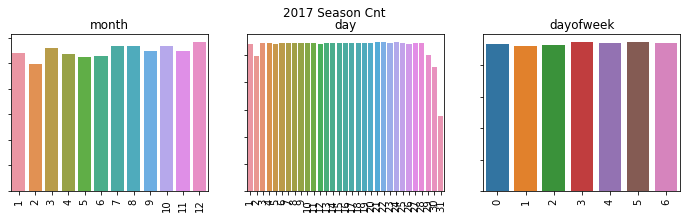

In [8]:
plt.figure(figsize = (12,3))
i = 1
df_tmp = df_train.loc[df_train.Date.dt.year == 2017,:]
for col in ['month', 'day', 'dayofweek']:
    ax = plt.subplot(1,3,i)
    cnt = df_tmp[col].value_counts()
    cnt.sort_index(inplace= True)
    sns.barplot(cnt.index, cnt.values, ax = ax)
    ax.set_title(col)
    ax.set_yticklabels('')
    ax.tick_params('x', rotation = 90)
    i += 1
plt.subplots_adjust(hspace = 0.2, top = 0.85)
plt.suptitle('2017 Season Cnt')
plt.show()

There are no special one month that has more data. But the Cnt of Day 2 and the tail of the month suddenly decrease.  I can understand of the tail part since 2017 Feb has 28 days and some month doesn't have 31 day.  And Day of week doesn't have any difference

#### #2. Number of Streams

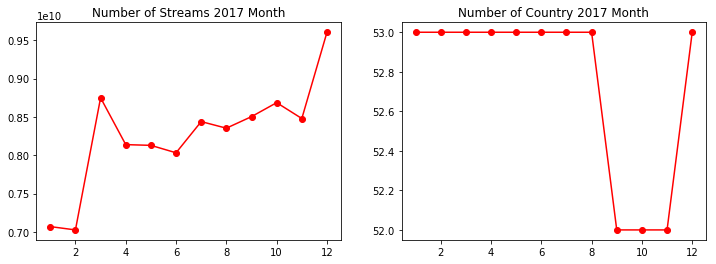

In [9]:
month_user = df_train.loc[df_train.Date.dt.year == 2017,:].groupby('month')['Streams'].sum().to_frame()
f, ax =plt.subplots(1,2,figsize = (12,4))
ax[0].plot(np.arange(1,13), month_user['Streams'], '-ro')
ax[0].set_title('Number of Streams 2017 Month')
country_per_month = df_train.loc[df_train.Date.dt.year == 2017,:].groupby('month')['Region'].nunique().to_frame()
ax[1].plot(np.arange(1,13), country_per_month['Region'], '-ro')
ax[1].set_title('Number of Country 2017 Month')
plt.show()

This two graphs unveil the number of user increased! Spotify expand their area to music industry over and over

#### #3. Sort of Top1

In [11]:
us_song = df_train.loc[df_train.Region == 'us',:]
df_stream = us_song[['Date', 'Track Name', 'Streams', 'Position']]
df_stream = df_stream.groupby(['Date', 'Track Name']).first().reset_index()
stream_num = df_stream.pivot(index = 'Date', columns = 'Track Name', values = 'Streams')
pos_num = df_stream.pivot(index = 'Date', columns = 'Track Name', values = 'Position')
us_unique_song = us_song['Track Name'].loc[us_song.Position == 1].unique()

def draw_stream_pos(us_unique_song, i, type_):
    song = us_unique_song[i]
    song_stream = stream_num.loc[:,song]
    song_pos = pos_num.loc[:,song]
    tmp = song_stream.loc[song_stream.notnull()]
    tmp2 = song_pos.loc[song_stream.notnull()]
    first = (tmp2.values == 1)
    not_first = ~first
    f, ax = plt.subplots(1,2,figsize = (12,4))
    ax[0].scatter(tmp.index[not_first], tmp.values[not_first], alpha = 0.4, color = 'grey')
    ax[0].scatter(tmp.index[first], tmp.values[first], color = 'red')
    ax[1].scatter(tmp2.index[not_first], tmp2.values[not_first], alpha = 0.4, color = 'grey')
    ax[1].scatter(tmp2.index[first], tmp2.values[first], color = 'red')
    ax[1].invert_yaxis()
    ax[1].set_title('Top1 Number : '+ str((tmp2.values == 1).sum()))
    ax[0].set_title(type_ + ': '+ song)
    plt.show()

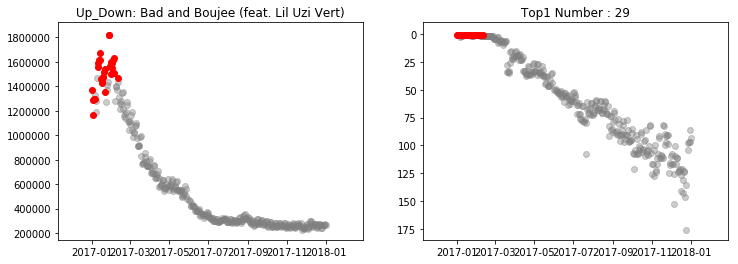

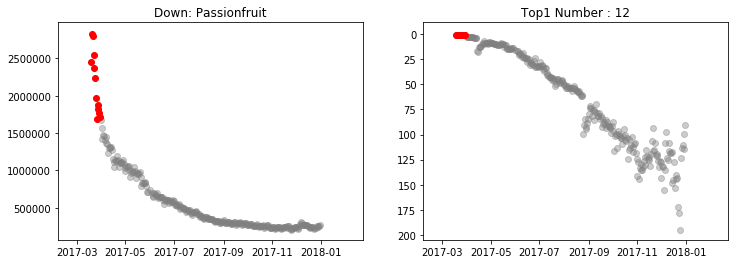

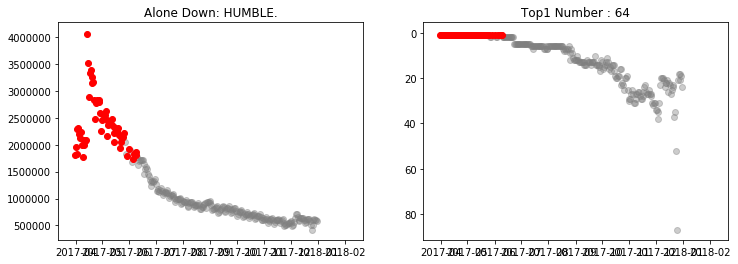

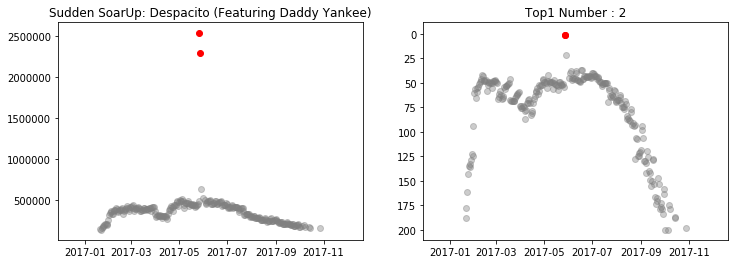

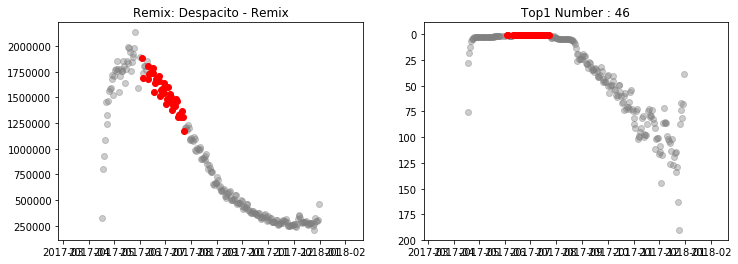

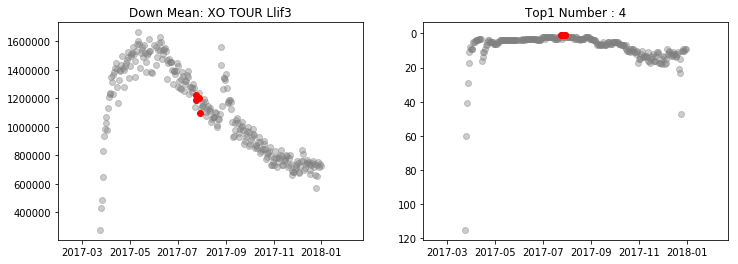

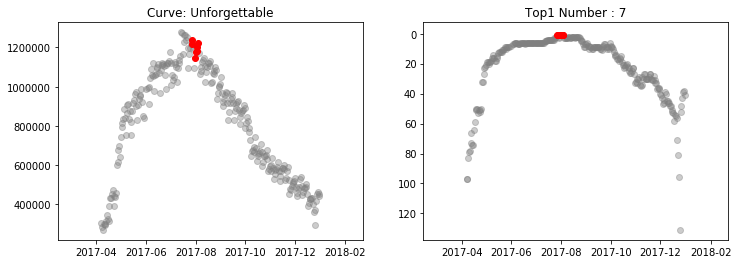

In [12]:
type_of_graph = {0: 'Up_Down', 2:'Down',3:'Alone Down', 4:'Sudden SoarUp', 5: 'Remix', 6:'Down Mean', 8:'Curve'}
for key, type_ in type_of_graph.items():
    draw_stream_pos(us_unique_song,key, type_)

There are 7 sort of Top1.  
- 1st graph: A general form which as soon as come back the number of stream increased then decreased smoothly
- 2nd graph: Because of the popularity of the singer, a song even far soar up, then decreased.
- 3rd graph: No enemy exist. The song alone touched 4 million! then keep its status over 2 million.
- 4th graph: BroadCast Power!? Suddenly Soar up even though releasing date so much went. 
- 5th graph: Remix of the old version
- 6th graph: Fortunately! The Top rankers Stream number decreased
- 7th graph: Hidden Pearl Found, a step by step increased the streams and touch top, then decreased smoothly

## 2. Song Charasteristic w/ All World

#### #1. Peek-A-Boo! Red Velvet

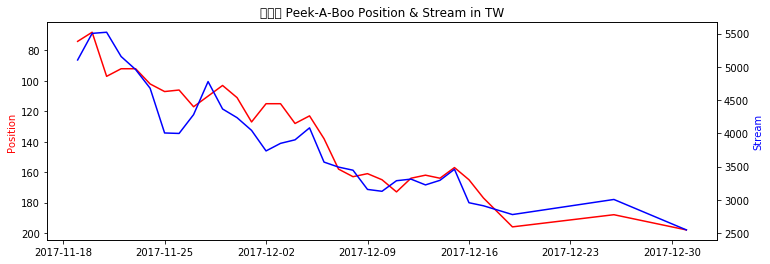

In [13]:
df_tw = df_train.loc[df_train['Region'] == 'tw',:]
df_red = df_tw.loc[(df_tw['Artist'] == 'Red Velvet'),:]
track_red = df_red['Track Name'].unique()

df_red_track0 = df_red.loc[df_red['Track Name'] == track_red[3], :]
plt.figure(figsize = (12,4))
ax = plt.subplot(1,1,1)
ax.set_ylabel('Position', color = 'red')
ax.plot(df_red_track0['Date'], df_red_track0['Position'], 'r-')
ax.invert_yaxis()
ax2 = ax.twinx()
ax2.set_ylabel('Stream', color = 'blue')
ax2.plot(df_red_track0['Date'], df_red_track0['Streams'], 'b-')
plt.title(track_red[3] + ' Position & Stream in TW')
plt.show()

**Red Velvet come back with Peek-A-Boo on 2017.11.17**  
They hit the highest position at the first week of their comback. Time goes by, the position and the number of stream of the song was decreasing : (   
Go Deeper into Red Velvet World!


In [14]:
df_red = df_train.loc[df_train['Artist'] == 'Red Velvet', :]
print('Unique Number of Col Values in Red Velvet')
df_red.apply(pd.Series.nunique)

Unique Number of Col Values in Red Velvet


Position       162
Track Name       7
Artist           1
Streams        569
URL              7
Date           172
Region           6
month            9
day             31
dayofweek        7
Region_full      6
dtype: int64

- Track Name linked to URL. But URL starts from different number. Is there any hidden secret key in the Position? I hope to see it next time.   
  
Now I try to find the Position according to Region_full!

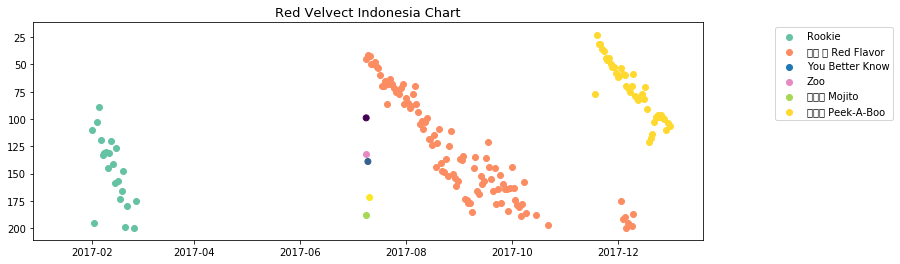

In [15]:
red_popular_region = df_red.loc[df_red['Region'] == 'id',:]
track_lst = red_popular_region['Track Name'].unique()
color = sns.color_palette('Set2', len(track_lst))
plt.figure(figsize = (12,4))
ax = plt.subplot(1,1,1)
i = 0
for track in track_lst:
    ix = red_popular_region['Track Name'] == track
    ax.scatter(x = red_popular_region.loc[ix,'Date'].values, y = red_popular_region.loc[ix,'Position'].values, c = color[i], label = track)
    i += 1
ax.invert_yaxis()
plt.legend(bbox_to_anchor=(1.1, 1))
plt.title('Red Velvect Indonesia Chart', fontsize = 13)
plt.show()

**Indonesia is the most popular countries of Red Velvet in the Data set.**  
 - Strange thing happen! Even though Peek-A-Boo opened on 2017 Nov, one yellow point(Peek-A-Boo) appeared on 2017.07. Some data was not correct.  
 
- 2017.11~2018.01, some song can rise up on the char if the Singer come back with a new song. The same case happend! Once 'Red Flavor' released, the ohter song, 'Blue : You Better Know', 'Purple: Zoo', 'Green: Mojito' appeared one time.

#### #2. Top Chart : Ed Sheeran

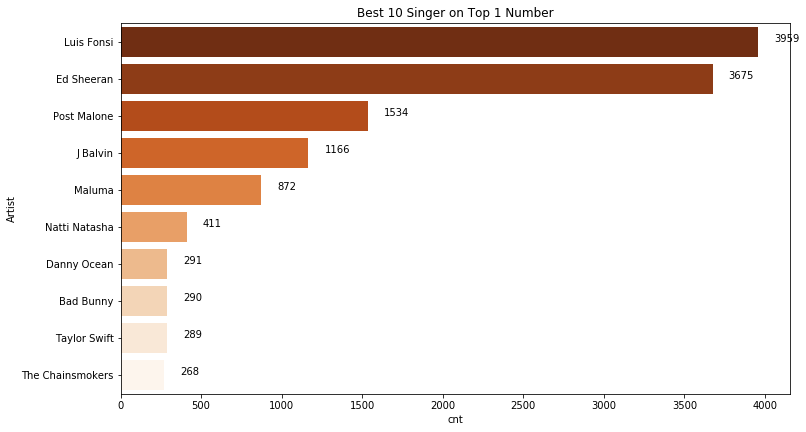

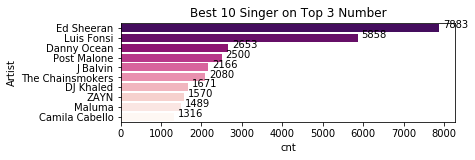

In [16]:
top_chart = df_train.loc[df_train['Position'] == 1, 'Artist'].value_counts()
top_chart = top_chart.to_frame().reset_index()
top_chart.columns = ['Artist', 'cnt']

plt.figure(figsize = (12,15))
ax = plt.subplot(2,1,1)
sns.barplot(data = top_chart.iloc[:10,:], y = 'Artist', x = 'cnt', ax = ax, palette = plt.cm.Oranges(np.linspace(1, 0, 10)))
for i in range(10):
    ax.text(top_chart.loc[i,'cnt']+100, i, str(top_chart.loc[i,'cnt']), fontsize = 10)
ax.set_title('Best 10 Singer on Top 1 Number')
plt.show()

top_chart = df_train.loc[df_train['Position'] <= 3, 'Artist'].value_counts()
top_chart = top_chart.to_frame().reset_index()
top_chart.columns = ['Artist', 'cnt']

ax = plt.subplot(2,1,2)
sns.barplot(data = top_chart.iloc[:10,:], y = 'Artist', x = 'cnt', ax = ax, palette = plt.cm.RdPu(np.linspace(1, 0, 10)))
for i in range(10):
    ax.text(top_chart.loc[i,'cnt']+100, i, str(top_chart.loc[i,'cnt']), fontsize = 10)
ax.set_title('Best 10 Singer on Top 3 Number')
plt.show()

- Ed Sheeran kept his highest status than the other!
- Singer:Song -> Camila Cabello, Havana? - Ed sheern, Shape of You? - Louis, Despacito!

In [17]:
df_sh = df_train.loc[df_train['Artist'] == 'Ed Sheeran',:]

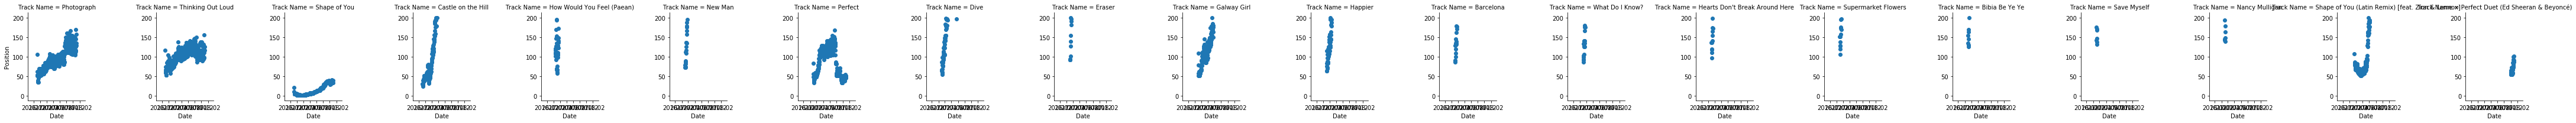

In [18]:
sh_region = df_sh['Region'].unique()
sh_ec = df_sh.loc[df_sh.Region == sh_region[0], :]
g = sns.FacetGrid(data = sh_ec, col = 'Track Name')
g.map(plt.scatter, 'Date', 'Position')
plt.show()

Oh my god! He has so many popular song!

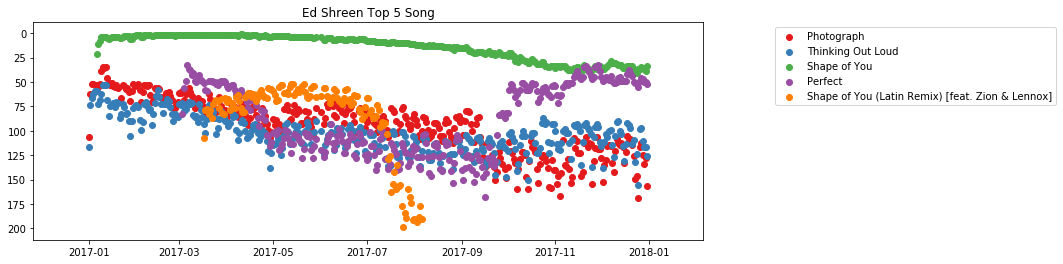

In [19]:
five_sh = sh_ec['Track Name'].value_counts()[:5].index.tolist()
plt.figure(figsize = (12,4))
ax = plt.subplot(1,1,1)
color = sns.color_palette('Set1',5)
i = 0
for track in five_sh:
    ix = sh_ec['Track Name'] == track
    ax.scatter(sh_ec.loc[ix, 'Date'].values, sh_ec.loc[ix,'Position'].values, c = color[i], label = track)
    i += 1
ax.invert_yaxis()
ax.legend(bbox_to_anchor = (1.1,1))
plt.title('Ed Shreen Top 5 Song')
plt.show()

- What is the condition of Top 1? I begin thinking that there are many songs in the chart by the singer!  
- And if the singer keep own status, the song is able to rise up the grade like 'Perfect'


#### #3. Seaonal Song
 In South Korea, some kind of song called Cherry Blossom Pension. Such songs always goes on the top chart. What the same characteristic of the song has a "Seasonal Word." (e.g.: Cherry Blossom, Beach, Snow). I try to investigate those words

In [20]:
def get_Season(month):
    if month in (1,2,11,12):
        season = 'winter'
    elif month in (3,4,5):
        season = 'spring'
    elif month in (6,7,8):
        season = 'summer'
    else:
        season = 'autumn'
    return season

df_train['season'] = df_train['month'].apply(get_Season)
tmp_season = df_train[['Track Name', 'Streams', 'Position']].groupby(df_train['season'])

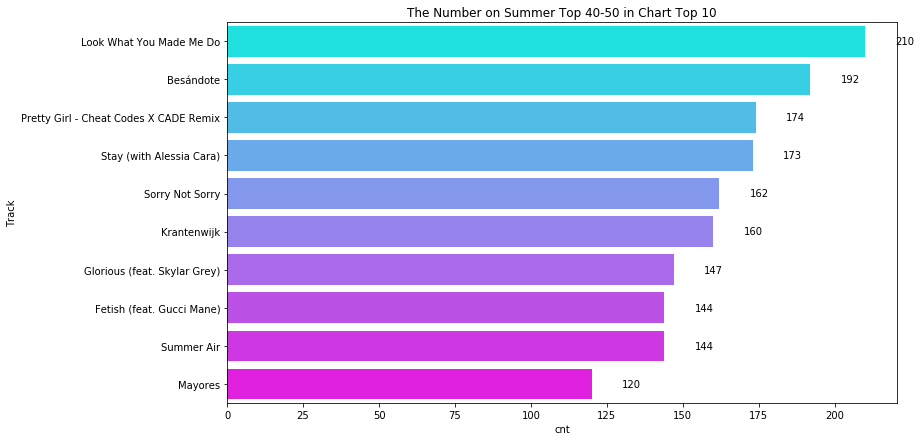

In [21]:
df_spring = tmp_season.get_group('summer')
spring_10 = df_spring[['Track Name', 'Position']].loc[df_spring.Position <= 10, :]
spring_cnt_10 = spring_10['Track Name'].value_counts().to_frame().reset_index()
spring_cnt_10.columns = ['Track', 'cnt']
plt.figure(figsize = (12,7))
ax = plt.subplot(1,1,1)
tmp_spring_10 = spring_cnt_10.iloc[np.arange(40,50),:]
tmp_spring_10.reset_index(drop=  True, inplace = True)
sns.barplot(y = 'Track', x = 'cnt', data = tmp_spring_10, ax = ax, palette = plt.cm.cool(np.linspace(0,1,10)))
for i in range(10):
    ax.text(tmp_spring_10.loc[i,'cnt']+10, i, str(tmp_spring_10.loc[i,'cnt']), va = 'center')
ax.set_title('The Number on Summer Top 40-50 in Chart Top 10')
plt.show()

My expectation is totally wrong. I could find a song, Summer Air, alone in seasonal analysis. But!

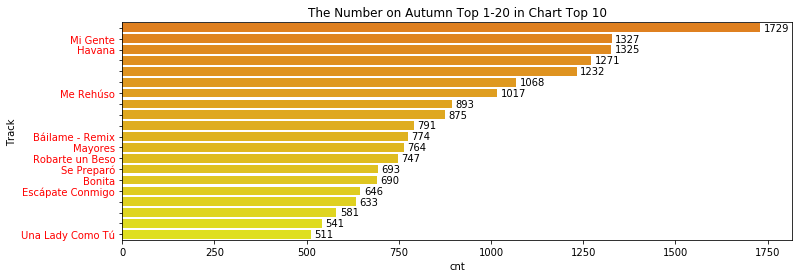

In [22]:
df_spring = tmp_season.get_group('autumn')
spring_10 = df_spring[['Track Name', 'Position']].loc[df_spring.Position <= 10, :]
spring_cnt_10 = spring_10['Track Name'].value_counts().to_frame().reset_index()
spring_cnt_10.columns = ['Track', 'cnt']
plt.figure(figsize = (12,4))
ax = plt.subplot(1,1,1)
tmp_spring_10 = spring_cnt_10.iloc[np.arange(0,20),:]
tmp_spring_10.reset_index(drop=  True, inplace = True)
sns.barplot(y = 'Track', x = 'cnt', data = tmp_spring_10, ax = ax, palette = plt.cm.autumn(np.linspace(0.5, 1, 20)))
for i in range(20):
    ax.text(tmp_spring_10.loc[i,'cnt']+10, i, str(tmp_spring_10.loc[i,'cnt']), va = 'center')
spanish = set([1,2,6,10,11,12,13,14,15,19])
track_name = tmp_spring_10.Track.values.tolist()
ax.set_yticklabels([track_name[i] if i in spanish else '' for i in range(20)], color = 'red')
ax.set_title('The Number on Autumn Top 1-20 in Chart Top 10')
plt.show()

Autum is good season for Spanish song! Among To 20, 10 Song, (Mi Gente, Havana, Me Rehuso, BAilame, Mayores, Robarte un Beso, Se Preparo, Bonita, Escapate Conmigo, Unda Lady Como Tu) were written by Spanish. What a appassionato seaosn it is!

#### #4. Emotional Song
 What kind of song is always on the board? Love! Love! Love! And Grief. I am supposed to search the emotional word.


In [23]:
df_train['lower_Track'] = df_train['Track Name'].apply(lambda word: word.lower())
us_song = df_train['lower_Track'].loc[df_train.Region == 'us']
unique_Song = pd.DataFrame(us_song.unique(), columns = ['track'])
unique_Song['track_set'] = unique_Song['track'].apply(lambda title: set(title.split(' ')))
emotion_dict = {}
for row in positive_word.iterrows():
    char = row[1]['char']
    col_name = 'em_' + char
    char_set = row[1]['word_set']
    emotion_dict[col_name] = unique_Song['track_set'].apply(lambda title_set: 0 if len(title_set & char_set) == 0 else 1)
unique_Song = pd.concat([unique_Song,pd.DataFrame.from_dict(emotion_dict, orient = 'columns')], axis = 1)
unique_Song.drop('track_set', axis = 1, inplace = True)

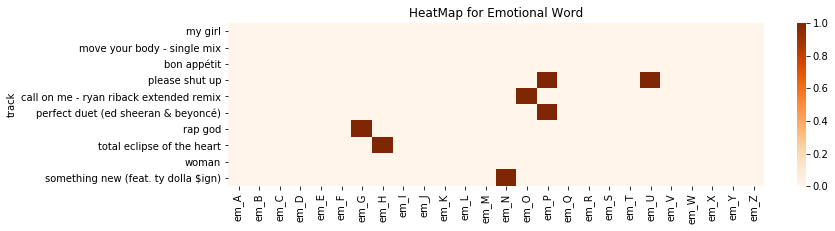

In [24]:
tmp_emotion = unique_Song.set_index('track')
plt.figure(figsize = (12,3))
ax = plt.subplot(1,1,1)
sns.heatmap(tmp_emotion.sample(10), cmap = plt.cm.Oranges, ax = ax)
ax.set_title('HeatMap for Emotional Word')
plt.show()

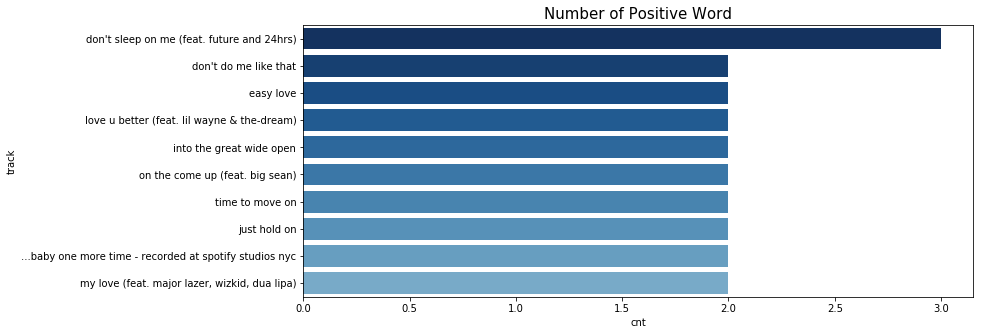

In [25]:
tmp_emotion_sum = tmp_emotion.sum(axis = 1).to_frame().reset_index()
tmp_emotion_sum.columns = ['track', 'cnt']
tmp_emotion_sum.sort_values('cnt', inplace = True, ascending = False)
plt.figure(figsize = (12,5))
ax = plt.subplot(1,1,1)
sns.barplot(x = 'cnt', y = 'track', data = tmp_emotion_sum.head(10), palette = plt.cm.Blues(np.linspace(1,0.5,10)), ax = ax)
ax.set_title("Number of Positive Word", size = 15)
plt.show()

In [26]:
print('# Song in US Chart: ', tmp_emotion_sum.shape[0])
print('The Song contains of English Positive Word: ',(tmp_emotion_sum.cnt != 0).sum())
print('The Song Not contains of English Positive Word: ',(tmp_emotion_sum.cnt == 0).sum())
print('--------------------------------------------------------------------------------------------')
us_chart = df_train.loc[(df_train.Region == 'us'),:]
top30_song = us_chart.loc[us_chart.Position <= 30, 'Track Name'].unique()
top30_song = pd.DataFrame(top30_song, columns = ['Track Name'])
top30_song['track'] = top30_song['Track Name'].apply(lambda track: track.lower())
top30_emotion_song = tmp_emotion_sum.merge(top30_song, how = 'right', on = 'track').fillna('None')
#top30_emotion_song.drop('track', axis = 1, inplace = True)
print('# Top 30 Song: ', top30_emotion_song.shape[0])
print('The 30 Song contains of English Positive Word: ',(top30_emotion_song.cnt != 0).sum())
print('The 30 Song Not contains of English Positive Word: ',(top30_emotion_song.cnt == 0).sum())

# Song in US Chart:  1593
The Song contains of English Positive Word:  406
The Song Not contains of English Positive Word:  1187
--------------------------------------------------------------------------------------------
# Top 30 Song:  299
The 30 Song contains of English Positive Word:  66
The 30 Song Not contains of English Positive Word:  233


20~25% of song in the total or top 30 US Chart contains the emotional words! 


## #3. Song Chraractertistic w/ Counry 

#### #1. Japane Chart
Each Country contains of songs written by each country language. It is natrual. But in Japan data I saw a werid situtations.

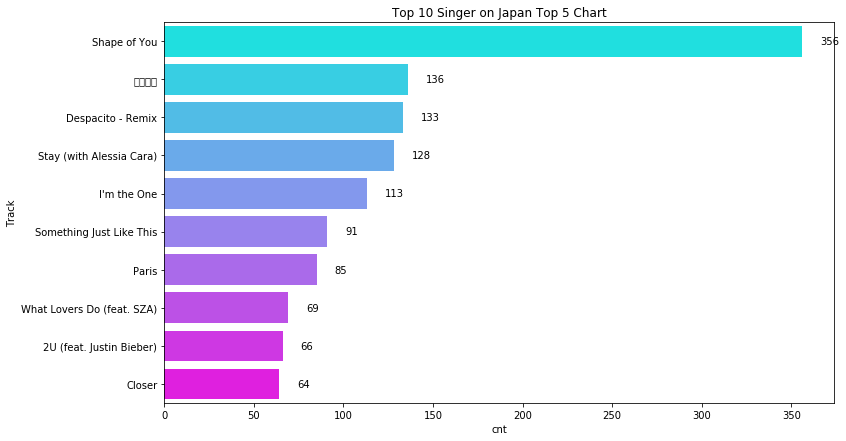

2nd song:  打上花火
Top 10 Singer on Japan Top 5 Lists
['The Chainsmokers', 'Ed Sheeran', 'Zedd', 'Luis Fonsi', 'DJ Khaled', 'POWERS', 'David Guetta', 'DAOKO×米津玄師', 'Maroon 5']


In [27]:
df_japan = df_train.loc[df_train.Region == 'jp',:]
jp_10 = df_japan[['Track Name', 'Position']].loc[df_japan.Position <= 5, :]
jp_cnt_10 = jp_10['Track Name'].value_counts().to_frame().reset_index()
jp_cnt_10.columns = ['Track', 'cnt']
plt.figure(figsize = (12,7))
ax = plt.subplot(1,1,1)
tmp_jp_10 = jp_cnt_10.iloc[np.arange(0,10),:]
tmp_jp_10.reset_index(drop=  True, inplace = True)
sns.barplot(y = 'Track', x = 'cnt', data = tmp_jp_10, ax = ax, palette = plt.cm.cool(np.linspace(0,1,10)))
ax.set_yticklabels(tmp_jp_10['Track'].values)
for i in range(10):
    ax.text(tmp_jp_10.loc[i,'cnt']+10, i, str(tmp_jp_10.loc[i,'cnt']), va = 'center')
ax.set_title('Top 10 Singer on Japan Top 5 Chart')
plt.show()
print('2nd song: ',tmp_jp_10.loc[1,'Track'])
print('Top 10 Singer on Japan Top 5 Lists')
print(df_japan.loc[df_japan['Track Name'].isin(tmp_jp_10.Track), 'Artist'].unique().tolist())

** The Major User of Spotify on Japan is likely not to hear the songs written by Japanes**  
Why are mot of songs written by English?  One song, '打上花火(Fireworks)' live in the chart alone as Japanese song. It didn't reflect the real country chart, but the country chart I think. 

#### 2. Correlation US with other Chart

In [28]:
date = df_train.Date.sample(1).values[0]
region_pos = df_train.loc[df_train.Date == date, ['Position','Track Name','Region']]
region_pos = region_pos.loc[region_pos.Position <= 30, :]
region_grp = region_pos.groupby('Region')
us_pos = region_grp.get_group('us')
us_track = set(us_pos['Track Name'].unique().tolist())
total_track = len(us_track)
#무관심 정도: Track Number of the Intersection == 0
#지난 10일간: 무관심정도
#관심 정도: Among intersected track, sum(abs(USchart - Con chart)) -> 0 simliar impact
#관심 정도: Among intersected track, sum(squared(USchart - Con chart)) -> Larger Severeal difference
#관심 정도: Among intersected track, sum(with same sign (US Chart- Con Chart) of squared(USChart - Con chart))
#-> Many -: Con is usually upper, Many +: Con is usually downer
country_info = []
for i, con in enumerate(region_pos.Region.unique()):
    if con == 'us':
        continue
    con_grp = region_grp.get_group(con)
    con_track = set(con_grp['Track Name'].unique().tolist())
    inter_track = us_track & con_track
    num_interest = len(inter_track)
    if num_interest == 0:
        con_dict = {'un_track': total_track - num_interest, 'int_track': num_interest, 'abs_diff':-1, 'sq_diff':-1,
        'sq_diff_min':-1, 'sq_diff_plus':-1}
    else:
        con_dict = {'un_track': total_track - num_interest, 'int_track': num_interest}
        track_dict = {}
        for track in inter_track:
            dif = us_pos.loc[us_pos['Track Name'] == track, 'Position'].values[0] - con_grp.loc[con_grp['Track Name'] == track, 'Position'].values[0]
            track_dict[track] = [dif, np.sign(dif)]
            
        track_dict_pd = pd.DataFrame.from_dict(track_dict, orient = 'index')
        track_dict_pd.columns = ['dif', 'sign']
        con_dict['abs_diff'] = track_dict_pd.dif.abs().sum()
        con_dict['sq_diff'] = np.power(track_dict_pd.dif,2).sum()
        con_dict['sq_diff_min'] = np.power(track_dict_pd.dif.loc[track_dict_pd.sign == -1],2).sum()
        con_dict['sq_diff_plus'] = np.power(track_dict_pd.dif.loc[track_dict_pd.sign == 1],2).sum()
    con_dict['country'] = con
    con_dict['trackNum'] = total_track
    country_info.append(con_dict)

In [29]:
country_df = pd.DataFrame.from_dict(country_info, orient = 'columns')
#country_df.set_index('country', inplace = True)
country_df['full_name'] = country_df['country'].map(dict_count)
country_df = country_df.reindex(['full_name','un_track', 'int_track', 'abs_diff', 'sq_diff', 'sq_diff_min', 'sq_diff_plus', 'country', 'trackNum', ], axis=1)
country_df.sort_values('int_track', ascending = False, inplace = True)
country_df.head(7)

,full_name,un_track,int_track,abs_diff,sq_diff,sq_diff_min,sq_diff_plus,country,trackNum
22,Canada,9,21,142,1674,681,993,ca,30
49,Latvia,12,18,136,1504,965,539,lv,30
30,Portugal,12,18,116,1374,756,618,pt,30
9,New Zealand,13,17,115,1123,567,556,nz,30
10,Estonia,13,17,161,2335,1718,617,ee,30
6,Lithuania,14,16,156,2064,1223,841,lt,30
35,Iceland,14,16,105,967,633,334,is,30


On 2017-11-06, even though Greece, Latvia, Slovakia are not the British-America culture country, they were influenced by US a lot!  
**[Variable Explanation]  **  
I create 4 more variables to express the degree of the relationship between US and others.  
Smaller values, there are litte difference between chart positions among intersected track.  
- abs_diff: sum(absolute( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song on the date  
- sq_diff: sum(squared( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song on the date  
- sq_diff_min: sum(squared( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song & the US chart over the Country Chart on the date  
- sq_diff_plus: sum(squared( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song & the US chart under the Country Chart on the date  

## #4. Modeling

#### 1. Shape of You, Setting A Basic Paramter: ARIMA Modeling for Stream

In [30]:
df_train = pd.read_csv('../input/spotifys-worldwide-daily-song-ranking/data.csv')
df_train.dropna(inplace = True)
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_us = df_train.loc[df_train.Region == 'us',:]
shape_of_you = df_us[['Date','Streams']].loc[df_us['Track Name'] == 'Shape of You',:]
shape_of_you.set_index('Date', inplace = True)

In [31]:
shape_of_you_tmp = shape_of_you.copy()

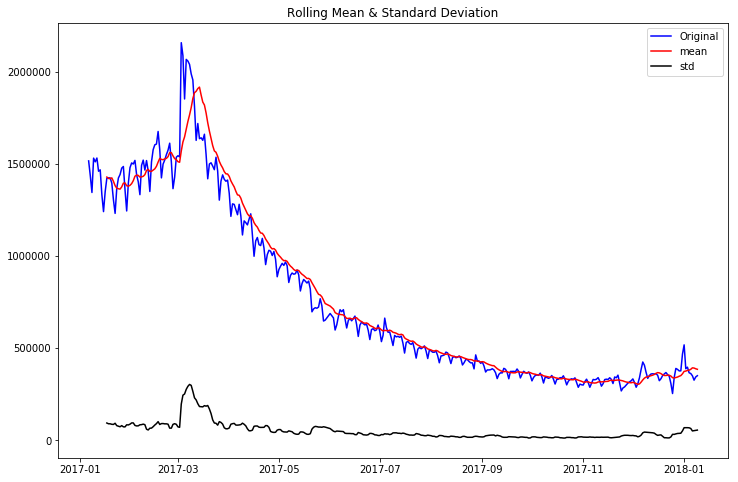

In [32]:
rollmean = pd.DataFrame.rolling(shape_of_you, window = 12).mean()
rollstd = pd.DataFrame.rolling(shape_of_you, window = 12).std()

fig = plt.figure(figsize=(12, 8))
plt.plot(shape_of_you, color = 'blue', label = 'Original')
plt.plot(rollmean, color = 'red', label = 'mean')
plt.plot(rollstd, color = 'k', label = 'std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Homm! As allued above, the streams linked to the last the number of streams. For choosing a wise differencing order, I used Dickey_fuller Test!

In [33]:
shape_of_you_tmp = shape_of_you.copy()
p_value = dict()
for tf in ['raw', 'log']:
    if tf == 'log':
        shape_of_you_tmp = np.log1p(shape_of_you_tmp)
        continue
    for dep in [0,1,2]:
        if dep == 0:
            tmp = shape_of_you_tmp.values
        elif dep == 1:
            tmp = shape_of_you_tmp.values.cumsum()
        elif dep == 2:
            tmp = shape_of_you_tmp.values.cumsum().cumsum()
            
        for reg in ['c', 'ct', 'ctt', 'nc']:
            dftest = adfuller(np.ravel(tmp), autolag='AIC', regression = reg)
            dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
            p_value[tf+'_'+reg + '_' + str(dep)] = dfoutput.loc['p-value']

p_value_df = pd.DataFrame([p_value]).T
p_value_df.columns = ['P value']
print(p_value_df[p_value_df.values < 0.05].sort_values('P value'))

            P value
raw_ctt_2  0.001408
raw_ct_1   0.006599
raw_c_1    0.010517


#### "x_y_num"
1. x, Type of Transformation
    In this kernel I skiped out of log since wihout log the model are enough explaining the Y values)
2. y, Parameter AR(P), MA(Q)
    (ctt: ' constant + linear and quadratic trend' , ct: 'constant + Local Trend from last few observations' , c: 'constant') 
*constant: Weights per Time Interval from the enitre dataset, e.g. if you have a positive one, the weight brings a positive effect to Y Prediction*
*Trend: Weights from the last few obersvations, e.g. the value reflects the last few tendency.*
*Linear and Qudratic Trend: Complicated Weights from the last few observations, e.g. it was a linear or Qudaratic function.*
3. num, Differencing Order D()

Dickey_Fuller Test said there are that 1 and 2 are effective differencing order.  

I will look at Autocorrelation and Partial Correlation Graph regard of 0,1,2. 0 Graph proved why we required a hihger Differencing Order.

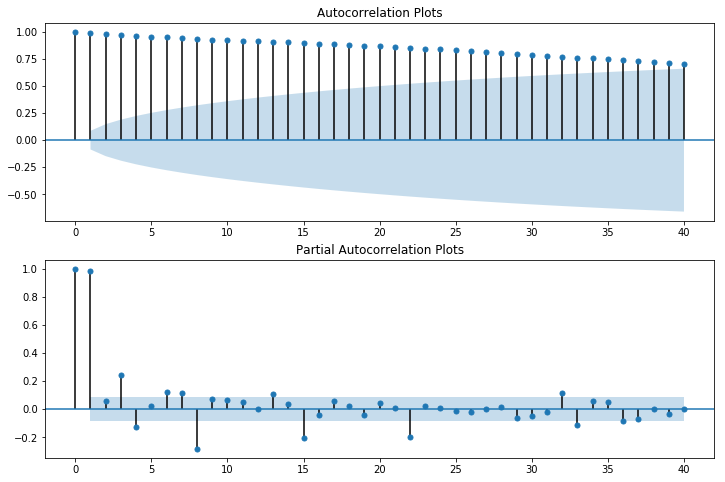

In [34]:
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(shape_of_you, lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(shape_of_you, lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('Partial Autocorrelation Plots')
plt.show()

 **If** the autocorrelation is steadily high + The Number of Positive High Peak on Partial Autocorrelation Plot << The Number of Posotive High Peak on Autocorrelation Plot  
    ->**then**  "We Need a Higher Order!" 

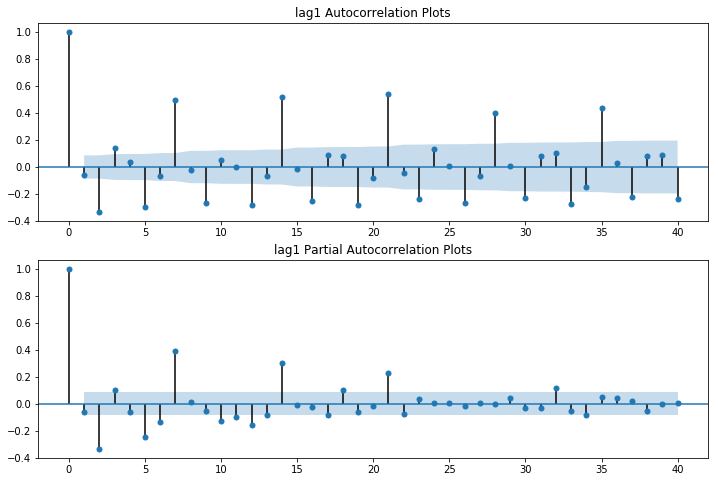

In [35]:
lag1_shape_of_you = shape_of_you - shape_of_you.shift(1)
lag2_shape_of_you = shape_of_you - 2*shape_of_you.shift(1) + shape_of_you.shift(2)
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(lag1_shape_of_you.dropna(inplace = False), lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('lag1 Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(lag1_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('lag1 Partial Autocorrelation Plots')
plt.show()

The First Lag explained a lot of models. But there are some high peaks that appeared regulary with the interval 7. So we should have a question, "Are there any Seasonal Impact?"  
*Although there are some negatie peaks, we passed those since those happend irregulary.*

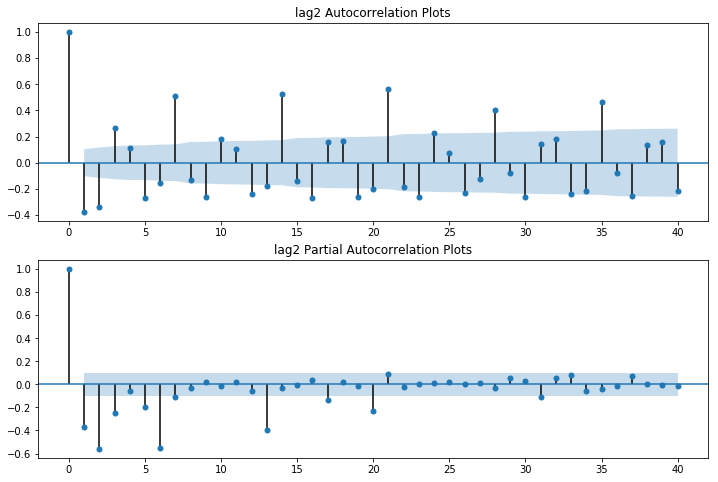

In [36]:
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(lag2_shape_of_you.dropna(inplace = False), lags=40, ax=ax1)
ax1.set_title('lag2 Autocorrelation Plots')

ax2 = f.add_subplot(212)
f = plot_pacf(lag2_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.05)
ax2.set_title('lag2 Partial Autocorrelation Plots')
plt.show()

There are no advantages for Lag2 rather than Lag1.  
I am skeptical to the negative peaks over 0.5. When the magnitue is under 0.5, it indicated the Difference Order have to be lower.

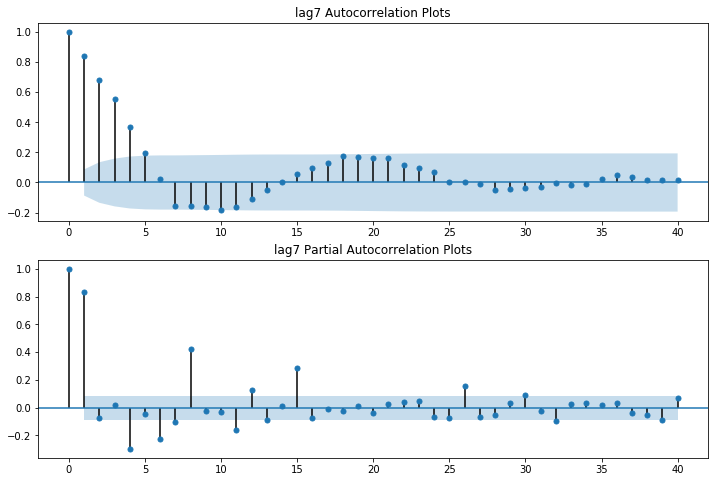

In [37]:
lag7_shape_of_you = shape_of_you - shape_of_you.shift(7)
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(lag7_shape_of_you.dropna(inplace = False), lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('lag7 Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(lag7_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('lag7 Partial Autocorrelation Plots')
plt.show()

When I only give the week impact, the graphs said that "I want the neighborhood power!!" with the positive peaks under small lags.

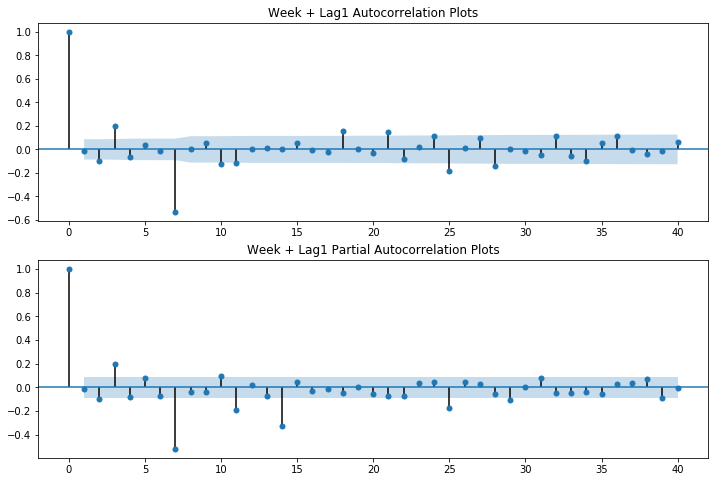

In [38]:
season_diff_shape_of_you = lag1_shape_of_you - lag1_shape_of_you.shift(7)
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(season_diff_shape_of_you.dropna(inplace = False), lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('Week + Lag1 Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(season_diff_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('Week + Lag1 Partial Autocorrelation Plots')
plt.show()

There seemed to have a good one than the previous ones, although there exists some negative peaks. I choose (1,1,0) x (1,1,0) as a base parameter of ARIMA Seasonal Model!

### 2. The Most Fitted Model to Train Data

In [39]:
def get_X(song):
    nrows = song.shape[0]
    num_train = int(nrows * 0.8)
    X_train, X_test = song.iloc[np.arange(0,num_train),:], song.iloc[np.arange(num_train, nrows),:]
    return X_train, X_test, (nrows, num_train)

def mdl_shape(mdl, row_info, name = '(1,1,0)x(1,1,0,7)xtrend t Model',exog = None, portion = 0.5):
    nrows, num_train = row_info
    result = mdl.fit()
    forecast = result.predict(start = int(nrows*portion), end = num_train, dynamic = True, exog = exog)
    X_train['forecast'] = np.hstack([np.zeros((int(nrows*portion)-1)), forecast.values])
    f,ax = plt.subplots(1,1,figsize = (12,4))
    X_train[['Streams','forecast']].plot(ax = ax)
    ax.set_title(name)
    plt.show()

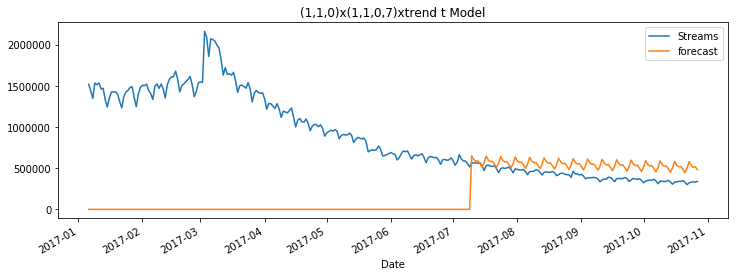

In [41]:
X_train, X_test,row_info = get_X(shape_of_you)
#Current Modl
mdl1 = SARIMAX(X_train, trend = 'n', order=(1,1,0), seasonal_order=(1,1,0,7))
mdl_shape(mdl1,row_info)

It was sooo bad model. Why it happens? The chosen basic parameter is not reflecting "Trend", which comes from the third parameter of both left and right bracket. So I added to 1 for third slots and delete the first slots since first and third collide with each other.

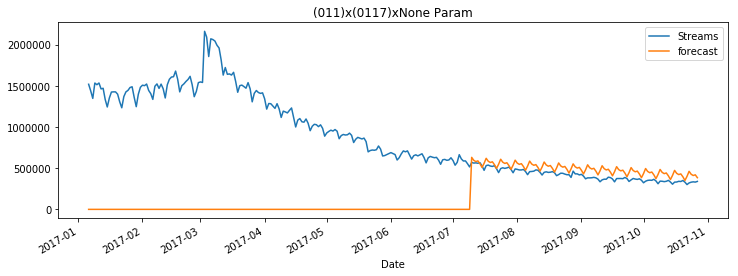

In [42]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(X_train, trend = 'n', order=(0,1,1), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = '(011)x(0117)xNone Param')

It was slightly better than the previous since MV(the last term of (x,y,z) pair) reflects the near power than AR. But still it looks like ugly. Did you remember when we test Dukey_Fuller Test? It  indicated raw_ct_2, "Difference 2 and Constant + Trend" is the best choice.

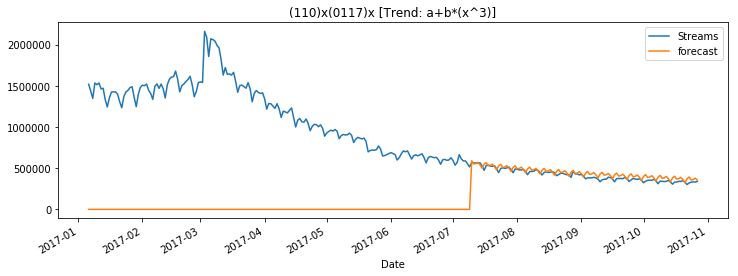

In [43]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(X_train, trend = [1,0,0,1], order=(1,1,0), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = '(110)x(0117)x [Trend: a+b*(x^3)]')
#mdl2 = SARIMAX(X_train, trend = [1,0,0,1], order=(1,1,0), seasonal_order=(0,1,1,7))
#mdl_shape(mdl2, name = '(110)x(0117)x [Trend: a1 + a2*(x^3)]')

Wow! It was more better than any other parameters.  
The Constant term comes from (110), the first slot 1 of the left part  + (The trends comes from (0,1,1), the last element 1 of the right part * Trend (3 powers!))

### 3.Test Prediction

In [44]:
def prediction_mdl(mdl,row_info, X_test, name = '', exog = None):
    nrows, num_train = row_info
    result = mdl2.fit()

    forecast = result.predict(start = num_train-1, end = nrows, dynamic = True, exog = exog)
    X_test['forecast'] = forecast[2:].values

    f,ax = plt.subplots(1,1,figsize = (12,4))
    X_test[['Streams','forecast']].plot(ax = ax)
    ax.set_title(name)
    plt.show()

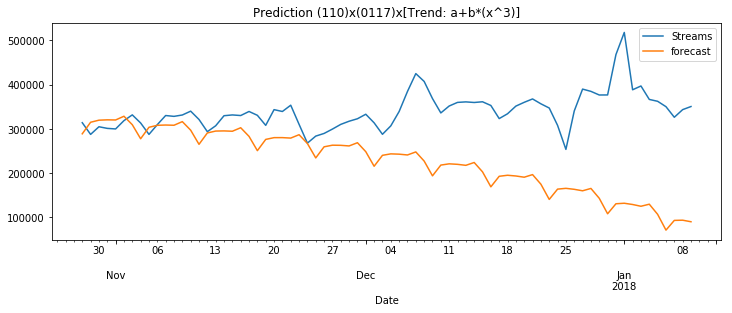

In [45]:
X_train, X_test, row_info = get_X(shape_of_you)
mdl2 = SARIMAX(X_train, trend = [1,0,0,1], order=(1,1,0), seasonal_order=(0,1,1,7))
prediction_mdl(mdl2, row_info, X_test, name = 'Prediction (110)x(0117)x[Trend: a+b*(x^3)]')

Disaster...... The reason is that the streams of the song suddenly escaped the last pattern decreasing. So the constant term is disater for this prediction. But if we delete constant trend and decrease the power of trend (3->1)!

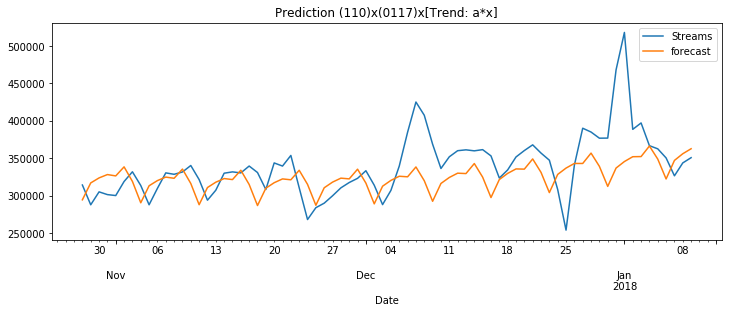

In [46]:
X_train, X_test,row_info = get_X(shape_of_you)
mdl2 = SARIMAX(X_train, trend = [0,1,0,0], order=(1,1,0), seasonal_order=(0,1,1,7))
prediction_mdl(mdl2, row_info, X_test, name = 'Prediction (110)x(0117)x[Trend: a*x]')

Its good to predict :)

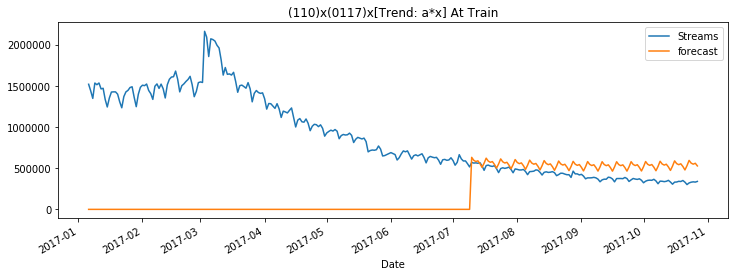

In [47]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(X_train, trend = [0,1,0,0], order=(1,1,0), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = '(110)x(0117)x[Trend: a*x] At Train')

But it was disaster for train set. But what if the model changes adding X variables?

#### 4. With X variables, exogenous SARIMAX

In [48]:
def tf_song_feature(song_feature):
    song_feature.drop(['id'], axis = 1, inplace= True)
    song_feature.rename(columns = {'name': 'Track Name', 'artists': 'Artist'}, inplace= True)
    return song_feature

song_feature = pd.read_csv('../input/top-tracks-of-2017/featuresdf.csv')
song_feature = tf_song_feature(song_feature)
exog = song_feature.loc[0,:].values[2:]

In [49]:
song_feature.head(1)

,Track Name,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0


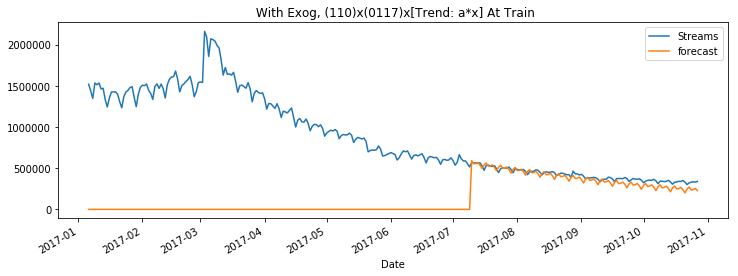

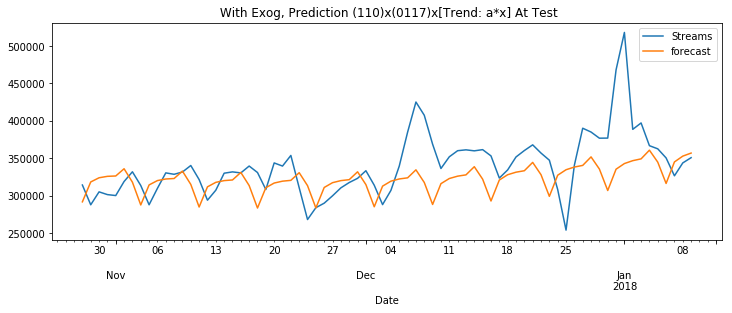

In [50]:
exog = exog.astype(float)
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(endog = X_train,exog = np.array([exog for i in range(X_train.shape[0])]), trend = [0,1,0,0], order=(1,1,0), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = ' With Exog, (110)x(0117)x[Trend: a*x] At Train', exog = exog.reshape(1,13))
X_train, X_test,row_info = get_X(shape_of_you)
prediction_mdl(mdl2, row_info, X_test, name = ' With Exog, Prediction (110)x(0117)x[Trend: a*x] At Test', exog = np.array([exog for i in range(75)]))

Wow! Attached X Makes Change!

#### 5. Additional Test to Meet the limtation of ARIMA

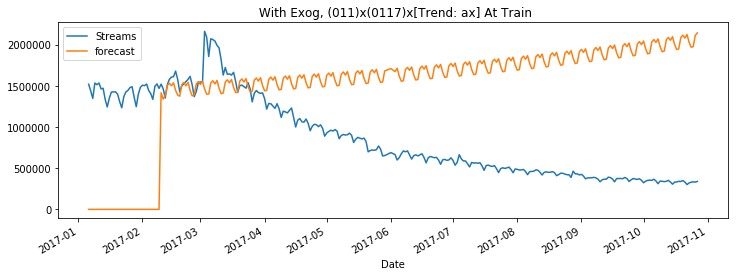

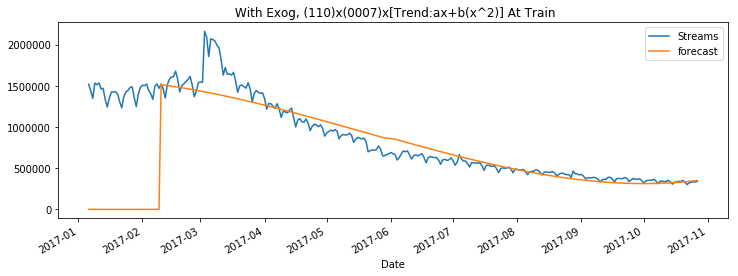

In [51]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl3 = SARIMAX(endog = X_train,exog = np.array([exog for i in range(X_train.shape[0])]), trend = 't', order=(0,1,1), seasonal_order=(1,1,0,7))
mdl_shape(mdl3, row_info,name = ' With Exog, (011)x(0117)x[Trend: ax] At Train', exog = exog.reshape(1,13), portion = 0.1)

X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl3 = SARIMAX(endog = X_train,exog = np.array([exog for i in range(X_train.shape[0])]), trend = [0,1,1], order=(1,1,0), seasonal_order=(0,0,0,7))
mdl_shape(mdl3, row_info,name = ' With Exog, (110)x(0007)x[Trend:ax+b(x^2)] At Train', exog = exog.reshape(1,13), portion = 0.1)

When I predict before The Power Peak Up, ARIMA totally dominated or ignored the peak up the all equations. But it was already known limtation for ARIMA.  :)

 ### Done! Happy to finish my Kernel to Spotify Journey! Please push Vote button if you enjoy :)
 I also want any comments to improve this kernel!

In [52]:
def merge_all():
    df_train, positive_word, song_feature = call_df()
    df_us = df_train.loc[df_train.Region == 'us',:]
    
    df_us.drop(['URL', 'day', 'dayofweek'], axis = 1, inplace = True)
    df_tr_us, df_tt_us = df_us.loc[df_us.month < 11,:], df_us.loc[df_us.month > 10,:]
    df_tr_us.drop('month', axis = 1, inplace=True)
    df_tt_us.drop('month', axis = 1, inplace=True)
    all_df = df_tr_us[['Track Name', 'Artist']].groupby(['Track Name', 'Artist']).size().reset_index()[['Track Name', 'Artist']]
    all_tt = df_tt_us[['Track Name', 'Artist']].groupby(['Track Name', 'Artist']).size().reset_index()[['Track Name', 'Artist']]
    tr_list =[all_df, rank_df(df_tr_us), emotion_song(df_tr_us, positive_word), rank_interval(df_tr_us), None]
    all_df = merge_df(*tr_list)
    
    tt_list =[all_tt, rank_df(df_tt_us), emotion_song(df_tt_us, positive_word), rank_interval(df_tt_us), None]
    all_tt = merge_df(*tt_list)
    
    return all_df, all_tt

def test_fitted_to_train(all_df, all_tt):
    artist_power = ['Position_min', 'Position_max', 'Streams_min',
       'Streams_max', 'Pos_0', 'Pos_1', 'Pos_2', 'Pos_3', 'Pos_4', 'Pos_5',
       'Pos_6', 'St_0', 'St_1', 'St_2', 'St_3', 'St_4', 'St_5', 'St_6',
       'd_interval']
    artist_power_df = all_df.groupby('Artist').agg({col : ['mean', 'median'] for col in artist_power})

    artist_power_df.columns = [col[0] + '_' + col[1] for col in artist_power_df.columns]
    artist_power_df = artist_power_df.dropna()
    artist_power_df = artist_power_df.astype(int)

    all_tt.drop(artist_power, axis =1, inplace = True)

    artist_power_df.reset_index(inplace=  True)
    all_tt = all_tt.merge(artist_power_df, on = ['Artist'], how = 'left')
    return all_tt

In [53]:
def call_df():
    
    df_train = pd.read_csv('../input/spotifys-worldwide-daily-song-ranking/data.csv')
    positive_word = pd.read_excel('../input/positive-words/positive_words.xlsx', header = None)
    df_feature = pd.read_csv('../input/top-tracks-of-2017/featuresdf.csv')
    positive_word.columns = ['char', 'word_set']
    positive_word['word_set'] = positive_word['word_set'].apply(lambda r: set([word.strip().lower() for word in r.split(',')]))
    df_train['Date'] = pd.to_datetime(df_train['Date'])
    df_train = df_train.loc[df_train.Date.dt.year == 2017,:]
    df_train['month'] = df_train.Date.dt.month
    df_train['day'] = df_train.Date.dt.day
    df_train['dayofweek'] = df_train.Date.dt.dayofweek
    df_train.dropna(inplace = True)
    return df_train, positive_word, df_feature

def merge_df(all_df, rank_df, emotion_song, rank_interval, song_feature = None, ):
    all_df = pd.merge(all_df, rank_df, on = ['Track Name', 'Artist'], how = 'left')
    all_df = pd.merge(all_df, rank_interval, on = ['Track Name', 'Artist'], how = 'left')
    all_df = pd.merge(all_df, emotion_song, on = ['Track Name'], how = 'left')
    if song_feature is not None:
        all_df = pd.merge(all_df, song_feature, on = ['Track Name', 'Artist'], how = 'left')
    return all_df

In [54]:
def rank_df(df_us, term = range(0,7)):
    grp_us = df_us.groupby(['Artist','Track Name'])
    first_pos = grp_us['Position', 'Streams'].nth(list(term)).reset_index()
    day_lst = list(map(str, term))
    pos_lst = ['Pos_'+day  for day in day_lst]
    st_lst = ['St_'+day  for day in day_lst]

    i,n = 0, first_pos.shape[0]
    df_list = []
    while i < n:
        first, singer, track = i, first_pos.loc[i, 'Artist'], first_pos.loc[i, 'Track Name']
        cur_pos_st = {'Artist':singer ,'Track Name': track}
    
        while i < n and singer == first_pos.loc[i, 'Artist'] and track == first_pos.loc[i, 'Track Name']:
            cur_pos_st[pos_lst[i-first]] = first_pos.loc[i, 'Position']
            cur_pos_st[st_lst[i-first]] = first_pos.loc[i, 'Streams']
            i += 1
        df_list.append(cur_pos_st)
    
    track_pos_st = pd.DataFrame(df_list)
    track_pos_st[pos_lst]  =  track_pos_st[pos_lst].fillna(201)
    track_pos_st[st_lst] = track_pos_st[st_lst].fillna(0)
    
    track_min_max = grp_us.agg({col : ['min', 'max'] for col in ['Position', 'Streams']}).reset_index()
    track_min_max.columns = [col[0]+'_'+col[1] if col[1] else col[0] for col in track_min_max.columns]
    track_rank = track_min_max.merge(track_pos_st, on = ['Artist','Track Name'], how = 'left')
    numerical_num = track_rank.select_dtypes(exclude = ['object']).columns
    track_rank[numerical_num] = track_rank[numerical_num].astype(int)
    return track_rank


In [55]:
def rank_interval(df_us):
    interval_df = df_us.groupby(['Artist', 'Track Name'])
    interval_df = interval_df.agg({'Date':['max','min']}).reset_index()
    interval_df['d_interval'] = interval_df.loc[:,('Date','max')] - interval_df.loc[:,('Date','min')]
    interval_df['d_interval'] = interval_df['d_interval'].apply(lambda row: str(row).split()[0])
    interval_df.columns = [col[0]+col[1] for col in interval_df.columns]
    interval_df['d_interval'] = interval_df['d_interval'].astype(int)
    interval_df = interval_df.loc[:,['Artist', 'Track Name', 'd_interval']]
    return interval_df

In [56]:
def emotion_song(df_us, positive_word):
    """
    Return:
        track, em_a, em_b, em_c, ... ,em_z: track is 
    """
    df_us['lower_Track'] = df_us['Track Name'].apply(lambda track: track.lower())
    us_song = pd.DataFrame(df_us['lower_Track'].unique(), columns = ['track'])
    us_song['track_set'] = us_song['track'].apply(lambda title: set(title.split(' ')))
    emotion_dict = {}
    for row in positive_word.iterrows():
        char = row[1]['char']
        col_name = 'em_' + char
        char_set = row[1]['word_set']
        emotion_dict[col_name] = us_song['track_set'].apply(lambda title_set: 0 if len(title_set & char_set) == 0 else 1)
    unique_song = pd.concat([us_song,pd.DataFrame.from_dict(emotion_dict, orient = 'columns')], axis = 1)
    unique_song.drop('track_set', axis = 1, inplace = True)
    tmp_emotion = unique_song.set_index('track')
    tmp_emotion_sum = tmp_emotion.sum(axis = 1).to_frame().reset_index()
    tmp_emotion_sum.columns = ['track', 'cnt']
    unique_song = unique_song.merge(tmp_emotion_sum, on = ['track'], how = 'left')
    unique_df = df_us[['lower_Track', 'Track Name']].groupby(['lower_Track', 'Track Name']).size().reset_index().loc[:, ['lower_Track', 'Track Name']]
    unique_song = unique_df.merge(unique_song, how = 'right', left_on = 'lower_Track', right_on = 'track')
    unique_song.drop(['lower_Track', 'track'], axis = 1, inplace = True)
    
    return unique_song

In [57]:
#all_df, all_tt = merge_all()

#print('test Set Singer number ', all_tt.Artist.nunique())
#print('Intersected Singer number ', len(set(all_tt.Artist.unique()) & set(all_df.Artist.unique())))